In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import os

## Read in data from loops

directory_path = r'/Users/rprocious/Waterlevels_CBI/CBI-2/Corrected_Data_Official/nesscanResult_removedBadNesdisRecords/PortIsabel'
dataframes = []


for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('.csv'):

        file_path = os.path.join(directory_path, filename)
        
        df = pd.read_csv(
        file_path,
        parse_dates=[0],
        na_values=[-999, -99, 99, 'NA', 'RM'],
        engine='python'   
        )
        df.columns = ['station #','date', 'pwl',]
        dataframes.append(df)

PI = pd.concat(dataframes, ignore_index=True)

def third_diff(dataset):
    pwl = dataset['pwl']
    # Use pandas shift to vectorize calculation
    third_difference = pwl.shift(3) - 3*pwl.shift(2) + 3*pwl.shift(1) - pwl
    return third_difference.dropna().reset_index(drop=True)

values = third_diff(PI)
values = round(values,4)
values = values.to_numpy()
nan_array = np.full(3, np.nan)
new_arr = np.concatenate((nan_array, values))
PI.insert(3,'3D',new_arr)
PI['Spike flag'] = 0
mean = PI['3D'].mean()
std = PI['3D'].std()

outliers = (PI['3D'] < mean - 5*std) | (PI['3D'] > mean + 5*std)

PI.loc[outliers, 'Spike flag'] = 1
PI['pwl_3D'] = PI.loc[PI['Spike flag']==0,'pwl']
PI

,station #,date,pwl,3D,Spike flag,pwl_3D
0,018,1990/08/21 05:06,1.277,NaN,0,1.277
1,018,1990/08/21 05:12,1.283,NaN,0,1.283
2,018,1990/08/21 05:18,1.286,NaN,0,1.286
3,018,1990/08/21 05:24,1.286,0.000,0,1.286
4,018,1990/08/21 05:30,1.295,-0.012,0,1.295
...,...,...,...,...,...,...
2837760,018,2024/11/05 14:54,1.610,-0.008,0,1.610
2837761,018,2024/11/05 15:00,1.600,0.015,0,1.600
2837762,018,2024/11/05 15:06,1.593,-0.012,0,1.593
2837763,018,2024/11/05 15:12,1.589,-0.000,0,1.589


(-1.0, 6.0)

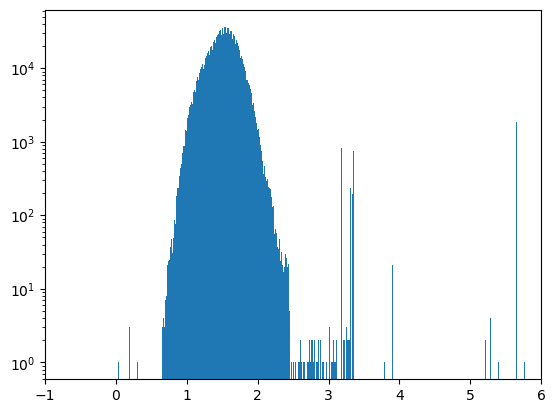

In [2]:
plt.hist(PI['pwl'],1000)
plt.yscale('log')
plt.xlim(-1,6)

(-1.0, 6.0)

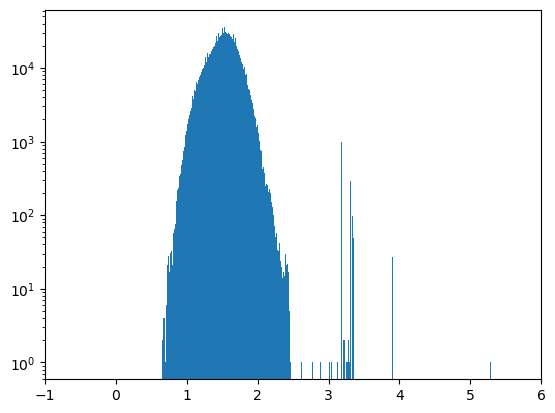

In [3]:
plt.hist(PI['pwl_3D'],1000)
plt.yscale('log')
plt.xlim(-1,6)

In [4]:
std

0.041939539938379795

In [5]:
mean

7.04780739190478e-10